In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import jieba
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
# ËÆæÁΩÆmatplotlibÁöÑÁîªÂõæÈ£éÊ†º
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
#ÈÄâ‰∏Ä‰∏™Hiragino Sans GB
plt.rcParams['font.sans-serif'] = 'Hiragino Sans GB' 

In [4]:
# ËØªÂèñcsvÊï∞ÊçÆ
df = pd.read_csv('Ê≤πÁÆ°ËØÑËÆ∫.csv',lineterminator="\n")

In [5]:
df.head(3)

author           publishtime  likeCount  \
0   @tomJerry-bz4dv  2023-11-26T11:00:33Z        0.0   
1  @user-vk3tr9pt7e  2023-11-26T09:33:13Z        0.0   
2           @m1a238  2023-11-18T04:53:00Z        0.0   

                                             comment  
0                               ÊãºÂ§öÂ§öÁöÑAPPÔºåÔºåÂæàÊµÅÊ∞ìÔºåÔºåÂêéÂè∞Âæà‰∏çËßÑÁü©  
1  ÊàëÂú®Ê∑òÂØ∂Ë≤∑‰∫ÜÂÖ¨‰ªî.Êî∂Âà∞Ë≤®ÊôÇ.Â∞±Ë¶∫Âæó‰∫∫Áâ©Â∞±ÊÄ™ÊÄ™ÁöÑ.Âú®Á∂≤‰∏äÂïèÂà•‰∫∫.ÊâçÁü•ÈÅìËá™Â∑±Ë≤∑Âà∞ÁõúÁâàT-TÂÄí‰∏çÊòØ...  
2                           ÂèØÊòØ‰Ω†ÊúâÊÉ≥ÈÅéË£ΩÈÄ†ÈÄô‰∫õÁî¢ÂìÅÁöÑÂãûÂ∑•ÂøÖÂÆöË¢´ÂâùÂâäÂãûÂäõËñ™Ë≥á

In [6]:
# ËØªÂèñÊ≤πÁÆ°ËØÑËÆ∫‰∏∫ÂàóË°®
douyin_comment_list = df['comment'].values.tolist()
# ÊääÂàóË°®ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤
douyin_comment_str=''.join(str(i) for i in douyin_comment_list)


In [7]:
# jiebaÂàÜËØç
jieba_text = " ".join(jieba.lcut(douyin_comment_str))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/p4/v3y49dz53t58v3vlm_ymgqwc0000gn/T/jieba.cache
Loading model cost 0.331 seconds.
Prefix dict has been built successfully.


In [8]:
def chinese_word_cut(mytext):
    jieba.load_userdict('user_dict.txt')  # ËøôÈáå‰Ω†ÂèØ‰ª•Ê∑ªÂä†jiebaÂ∫ìËØÜÂà´‰∏ç‰∫ÜÁöÑÁΩëÁªúÊñ∞ËØçÔºåÈÅøÂÖçÂ∞Ü‰∏Ä‰∫õÊñ∞ËØçÊãÜÂºÄ
    jieba.initialize()  # ÂàùÂßãÂåñjieba
    # ÊñáÊú¨È¢ÑÂ§ÑÁêÜ ÔºöÂéªÈô§‰∏Ä‰∫õÊó†Áî®ÁöÑÂ≠óÁ¨¶Âè™ÊèêÂèñÂá∫‰∏≠ÊñáÂá∫Êù•
    new_data = re.findall('[\u4e00-\u9fa5]+', mytext, re.S)
    new_data = " ".join(new_data)
    # ÊñáÊú¨ÂàÜËØç
    seg_list_exact = jieba.lcut(new_data)
    result_list = []
    # ËØªÂèñÂÅúÁî®ËØçÂ∫ì
    with open('stop_word.txt', encoding='utf-8') as f: # ÂèØÊ†πÊçÆÈúÄË¶ÅÊâìÂºÄÂÅúÁî®ËØçÂ∫ìÔºåÁÑ∂ÂêéÂä†‰∏ä‰∏çÊÉ≥ÊòæÁ§∫ÁöÑËØçËØ≠
        con = f.readlines()
        stop_words = set()
        for i in con:
            i = i.replace("\n", "")   # ÂéªÊéâËØªÂèñÊØè‰∏ÄË°åÊï∞ÊçÆÁöÑ\n
            stop_words.add(i)
    # ÂéªÈô§ÂÅúÁî®ËØçÂπ∂‰∏îÂéªÈô§ÂçïÂ≠ó
    for word in seg_list_exact:
        if word not in stop_words and len(word) > 1:
            result_list.append(word)      
    return result_list


In [9]:
words = chinese_word_cut(jieba_text)
words = [item for item in words if len(item)>1]
counts = Counter(words)
for word,count in counts.most_common(50):
    print(word,count)
print ('Â∑≤ÁªüËÆ°Êï∞ÈáèÊéíÂâç50ÁöÑËØç')


‰∏≠ÂõΩ 123
‰∏≠Âúã 121
Ë•øÂ≠ê 78
ÁªèÊµé 74
ÁúüÁöÑ 69
‰∫∫Ê∞ë 67
Êùé‰Ω≥Áê¶ 65
Âä™Âäõ 60
Á∂ìÊøü 54
ÁúâÁ¨î 54
Âè∞ÁÅ£ 49
Â∑•‰Ωú 48
‰æøÂÆú 45
‰ªÄÈ∫º 45
‰∏ñÁïå 45
Èü≠Ëèú 41
ÂìÅÁâå 39
‰∏äÊµ∑ 37
ÁîüÊ¥ª 36
ÊùéËÄÅÂ∏à 36
ÈÇÑÊòØ 34
ÊîøÂ∫ú 34
Â∑•ËµÑ 32
ÂúãÂÆ∂ 31
‰∏ÄÂÄã 31
ÁèæÂú® 30
Ê∞ë‰∏ª 29
ÂõΩÂÆ∂ 29
‰∏ãË°å 28
Êúâ‰∫∫ 27
‰∏çÁî® 26
Áõ¥Êí≠ 26
ÂõΩË¥ß 25
‰ªñÂÄë 24
‰∏≠Âúã‰∫∫ 24
‰∏úË•ø 23
Ê≤íÊúâ 23
ÂïèÈ°å 23
ÁúâÁ≠Ü 22
‰ª∑Ê†º 21
‰∏≠ÂÖ± 21
‰∏ÄÊ®£ 21
ÂÖ∂ÂØ¶ 20
‰∏çÊúÉ 20
Âõ†ÁÇ∫ 20
ÂÖ±Áî¢Èª® 20
ÂÖ¨Âè∏ 20
ËÄÅÊùø 20
ÈÄô‰∫õ 20
Âè™ËÉΩ 20
Â∑≤ÁªüËÆ°Êï∞ÈáèÊéíÂâç50ÁöÑËØç


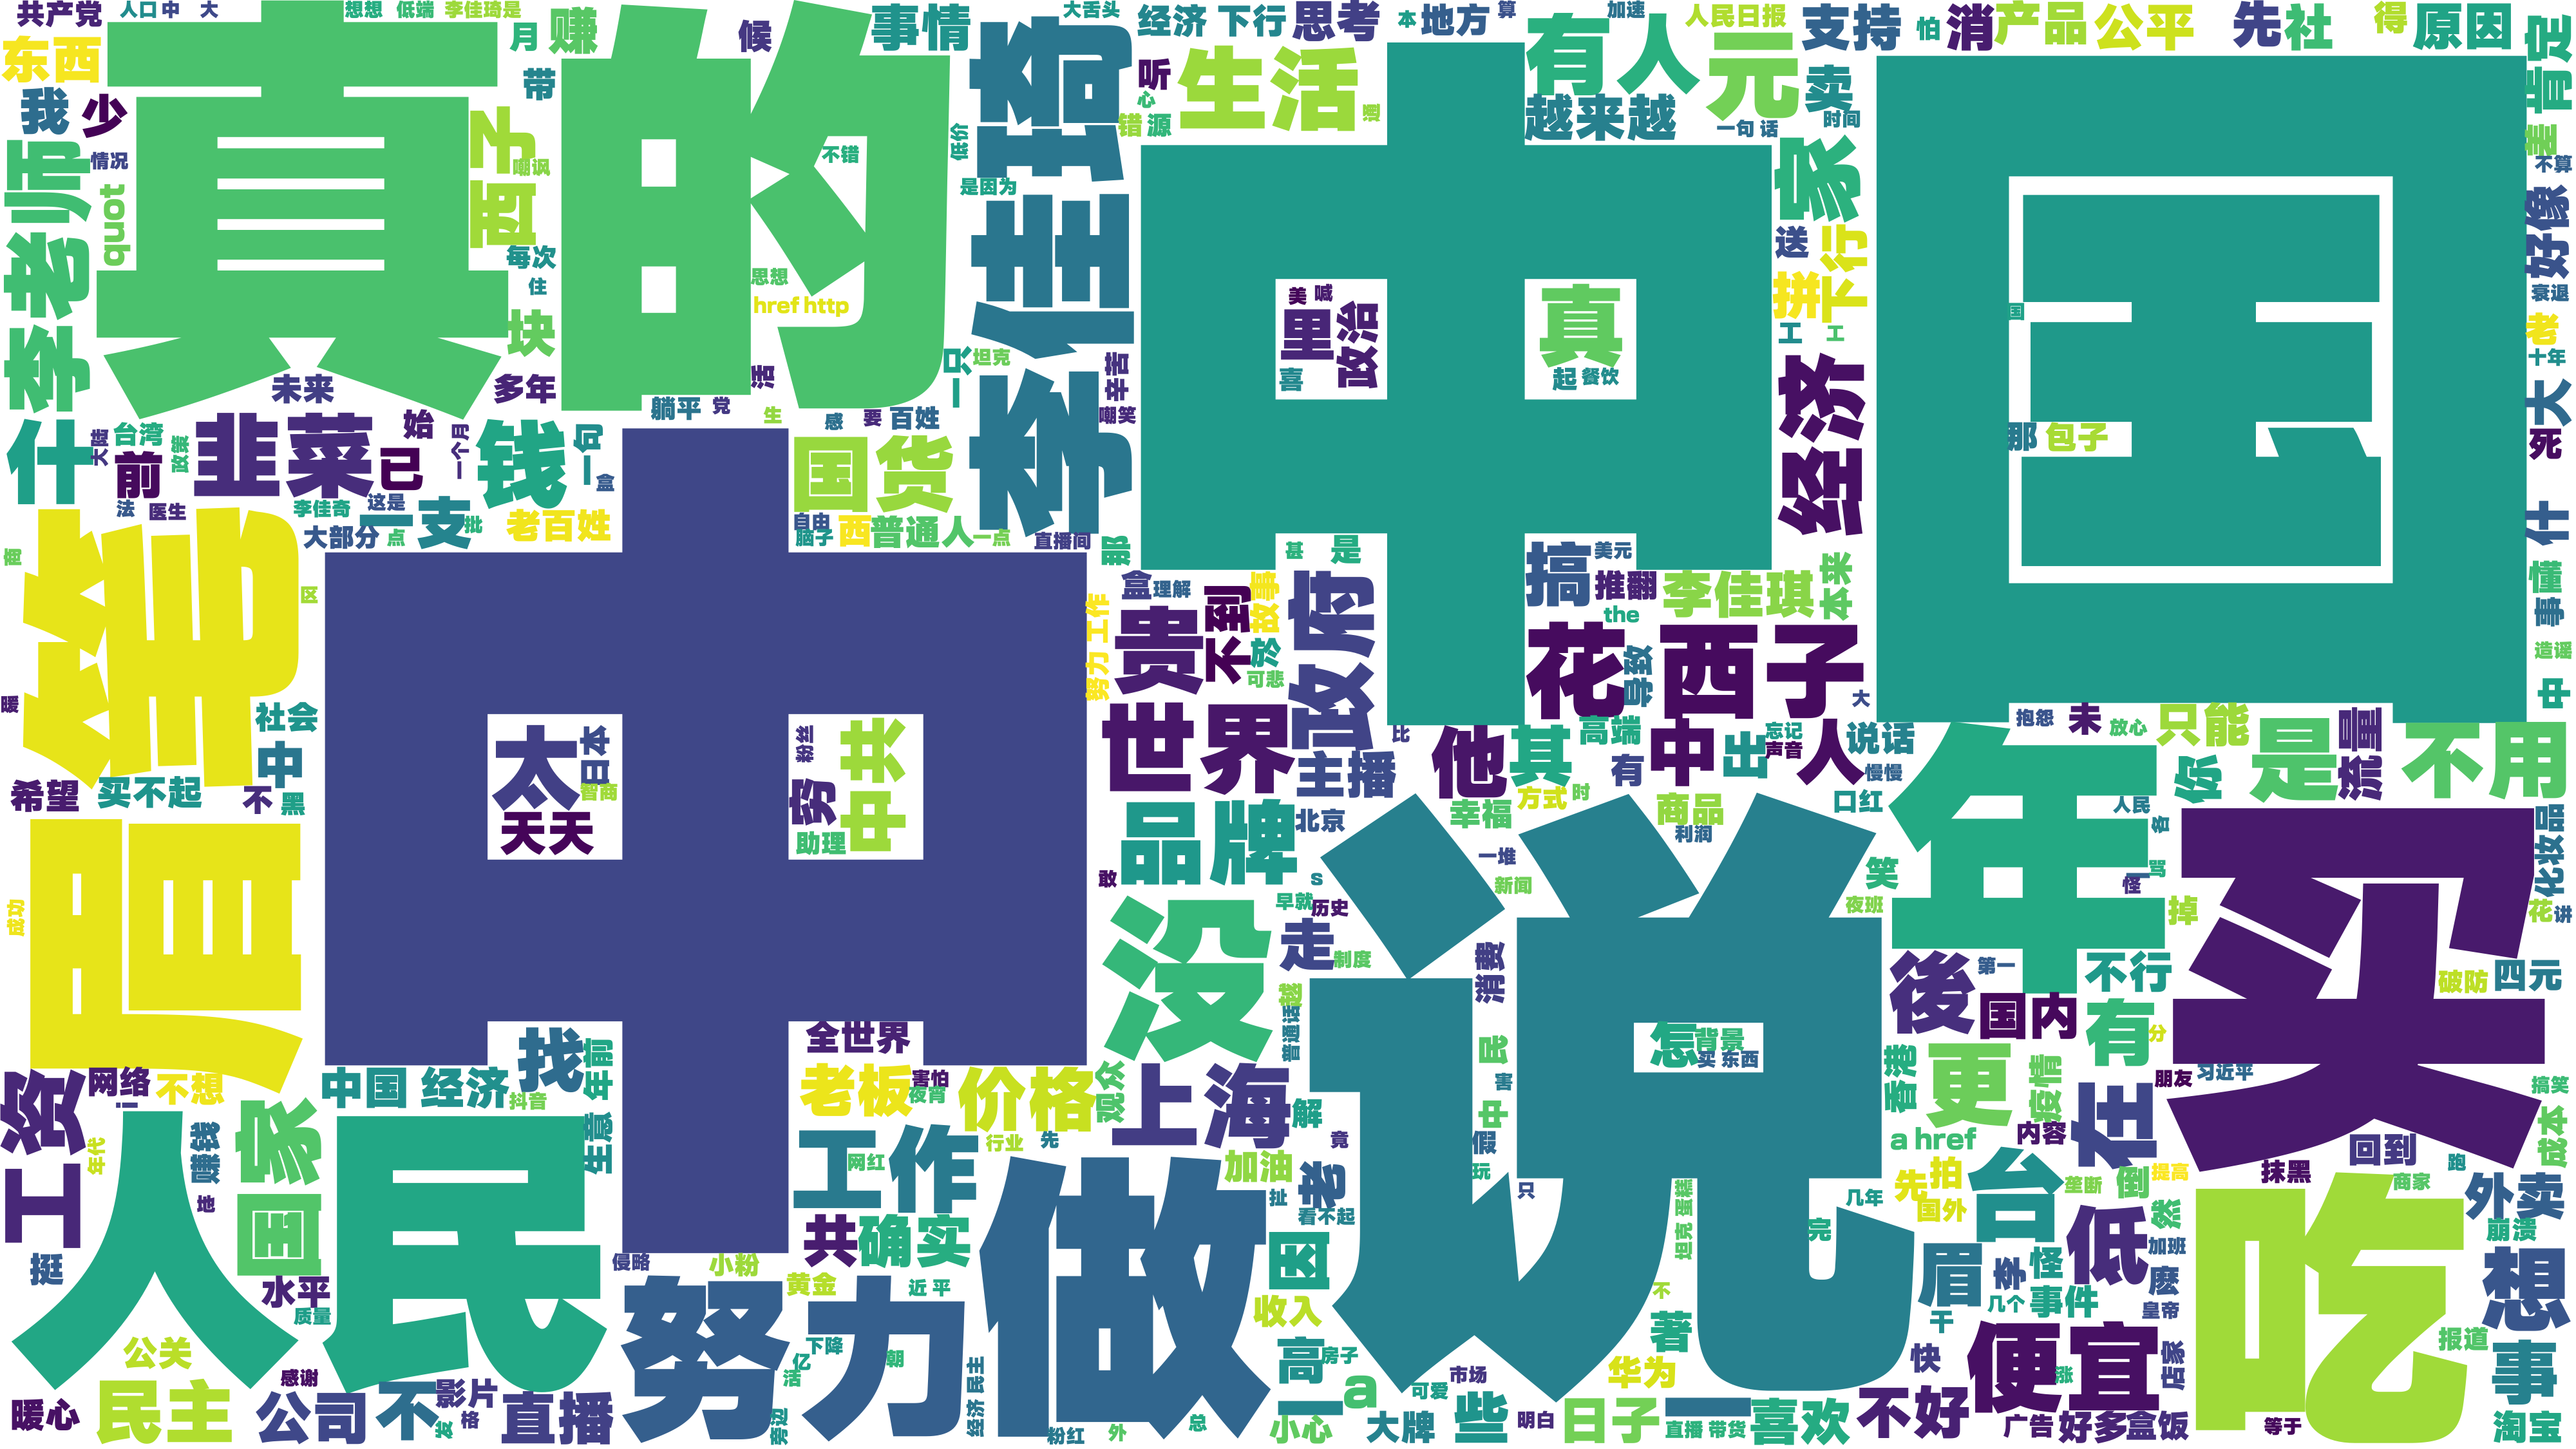

In [ ]:

# ËØç‰∫ëÂõæ

stopwords = open(r"stop_word.txt",encoding='utf-8').read().split("\n")

wc = WordCloud(
    scale=5,  # Ê∏ÖÊô∞Â∫¶
    margin=0,  # ËæπË∑ù
    background_color="white",  # ËÉåÊôØÈ¢úËâ≤
    max_words=1200,  # ÊúÄÂ§ßÂ≠óÁ¨¶Êï∞
    width=800,  # ÂõæÂÆΩ
    height=450,  # ÂõæÈ´ò
    font_path='/Users/wangshuoxin/python_document/Áà¨Ëô´/Ê≤πÁÆ°ÊµãËØï/HYQiHei-105.ttf',  # MacÁ≥ªÁªüÂ≠ó‰ΩìÊñá‰ª∂Ë∑ØÂæÑ
    stopwords=stopwords,  # ÂÅúÁî®ËØç
    random_state=800  # ËÆæÁΩÆÊúâÂ§öÂ∞ëÁßçÈöèÊú∫ÁîüÊàêÁä∂ÊÄÅÔºåÂç≥ÊúâÂ§öÂ∞ëÁßçÈÖçËâ≤ÊñπÊ°à
)
wc.generate_from_text(jieba_text)  # ÁîüÊàêËØç‰∫ëÂõæ
wc.to_file('Ê≤πÁÆ°ËØÑËÆ∫_ËØç‰∫ëÂõæ.png')  # ‰øùÂ≠òÂõæÁâá
wc.to_image()  # ÊòæÁ§∫ÂõæÁâá

In [11]:
#Êé•‰∏ãÊù•ËøõË°åÊÉÖÊÑüÂàÜÊûê
import pandas as pd  # Êï∞ÊçÆÂàÜÊûêÂ∫ì
from textblob import TextBlob  # Ëã±ÊñáÊÉÖÊÑüÂàÜÊûêÂ∫ì(ÂÖ∂ÂÆûÂàÜÊûêÂæÆÂçöÁî®‰∏çÂà∞)
import matplotlib.pyplot as plt  # ÁîªÂõæ
from snownlp import SnowNLP #Ëøô‰∏™ÊâçÂÖ≥ÈîÆ
from wordcloud import ImageColorGenerator
from PIL import Image
import numpy as np

In [12]:
file = "Ê≤πÁÆ°ËØÑËÆ∫.csv"
df2 = pd.read_csv(file, lineterminator="\n",usecols=[1,2,3]) #ËØªÂèñÊäñÈü≥Êï∞ÊçÆ
df2.head(10)

publishtime  likeCount  \
0  2023-11-26T11:00:33Z        0.0   
1  2023-11-26T09:33:13Z        0.0   
2  2023-11-18T04:53:00Z        0.0   
3  2023-11-15T07:28:29Z        1.0   
4  2023-11-15T06:36:43Z        1.0   
5  2023-11-14T10:28:35Z        0.0   
6  2023-11-13T08:34:49Z        2.0   
7  2023-11-12T04:23:26Z        1.0   
8  2023-11-11T14:24:03Z        1.0   
9  2023-11-11T12:41:44Z        0.0   

                                             comment  
0                               ÊãºÂ§öÂ§öÁöÑAPPÔºåÔºåÂæàÊµÅÊ∞ìÔºåÔºåÂêéÂè∞Âæà‰∏çËßÑÁü©  
1  ÊàëÂú®Ê∑òÂØ∂Ë≤∑‰∫ÜÂÖ¨‰ªî.Êî∂Âà∞Ë≤®ÊôÇ.Â∞±Ë¶∫Âæó‰∫∫Áâ©Â∞±ÊÄ™ÊÄ™ÁöÑ.Âú®Á∂≤‰∏äÂïèÂà•‰∫∫.ÊâçÁü•ÈÅìËá™Â∑±Ë≤∑Âà∞ÁõúÁâàT-TÂÄí‰∏çÊòØ...  
2                           ÂèØÊòØ‰Ω†ÊúâÊÉ≥ÈÅéË£ΩÈÄ†ÈÄô‰∫õÁî¢ÂìÅÁöÑÂãûÂ∑•ÂøÖÂÆöË¢´ÂâùÂâäÂãûÂäõËñ™Ë≥á  
3  Âú®Âè∞ÁÅ£Ë≤∑Êù±Ë•øÁúüÁöÑÂæàÊñπ‰æøÔºåÂ∞±ÁÆó‰∏çÁî®Á∂≤ÊãçÂéªË°ó‰∏äË≤∑ÂÖ∂ÂØ¶‰πüÂæàÂø´ÔºåËÄå‰∏îÁ∂≤Êãç‰∏ã‰æÜÁöÑÊù±Ë•øÊúâÁöÑÂìÅË≥™ÁúüÁöÑ‰∏çÊÄéÊ®£...  
4                              ÊãºÂ§öÂ§öÊúâËÅΩË™™ÈÅé‰∏çÈåØÔºå‰ΩÜÊòØÊµ∑Â§ñÁöÑ‰∫∫‰∏çÂ•ΩË®ªÂÜä„ÄÇ  
5                                    Êù±ÊòáË•øÈôçÔºåÈòªÂúãÁúüÁâÜÂ§ßÔºåË≥ºÊöñÂøÉüòä  
6                        Ê∑òÂØ∂Êó©Â∞±‰∏çË°å‰∫Ü„ÄÇÁèæÂú®ÊãºÂ§öÂ§öÊäñÈü≥ ÁîöËá≥Ë¶ñÈ†ªËôüÈÉΩÊØîÊ∑òÂØ∂Â•Ω„ÄÇ  
7                                         ÂÖßÂÆπË™™ÂæóÁúüË≤ºÂàáÔºåüëçüèª  
8  ÊäñÈü≥Ë¶ÅÂØ¶ÂêçÊâçËÉΩË≤∑Êù±Ë•øÔºåÂè∞ËÉûË≠â‰∏çË°åÈô§ÈùûËæ¶ÂÄã18Á¢ºÁöÑÂ±ÖÊ∞ëÂ±Ö‰ΩèË≠âÔºåÊÑüË¶∫‰ªäÂπ¥Èõô11Èä∑ÂîÆÊòØÁúüÁöÑ‰∏çÂ•ΩÔºåÂâç...  
9                 Âú®ÁΩëÁªú‰∏ä‰∫ÜÂá†Ê¨°ÂΩìÔºåÂæàÂ∞ëÁΩëÁªúË≤∑‰∫Ü„ÄÇÂú®Â§ßÈ©¨ÔºåË∫´‰ªΩË¢´ÁõóÂèñ‰∫ÜÔºåÂæàÈ¨ºÈ∫ªÁÉ¶ÁöÑüò°ÔºÅ

In [13]:
#  ÊÉÖÊÑüÂàÜÊûê
df2['ÊÉÖÊÑü'] = df2['comment'].apply(lambda x: SnowNLP(x).sentiments if isinstance(x, str) else 0.0)
df2.head()

publishtime  likeCount  \
0  2023-11-26T11:00:33Z        0.0   
1  2023-11-26T09:33:13Z        0.0   
2  2023-11-18T04:53:00Z        0.0   
3  2023-11-15T07:28:29Z        1.0   
4  2023-11-15T06:36:43Z        1.0   

                                             comment        ÊÉÖÊÑü  
0                               ÊãºÂ§öÂ§öÁöÑAPPÔºåÔºåÂæàÊµÅÊ∞ìÔºåÔºåÂêéÂè∞Âæà‰∏çËßÑÁü©  0.234728  
1  ÊàëÂú®Ê∑òÂØ∂Ë≤∑‰∫ÜÂÖ¨‰ªî.Êî∂Âà∞Ë≤®ÊôÇ.Â∞±Ë¶∫Âæó‰∫∫Áâ©Â∞±ÊÄ™ÊÄ™ÁöÑ.Âú®Á∂≤‰∏äÂïèÂà•‰∫∫.ÊâçÁü•ÈÅìËá™Â∑±Ë≤∑Âà∞ÁõúÁâàT-TÂÄí‰∏çÊòØ...  0.977121  
2                           ÂèØÊòØ‰Ω†ÊúâÊÉ≥ÈÅéË£ΩÈÄ†ÈÄô‰∫õÁî¢ÂìÅÁöÑÂãûÂ∑•ÂøÖÂÆöË¢´ÂâùÂâäÂãûÂäõËñ™Ë≥á  0.741640  
3  Âú®Âè∞ÁÅ£Ë≤∑Êù±Ë•øÁúüÁöÑÂæàÊñπ‰æøÔºåÂ∞±ÁÆó‰∏çÁî®Á∂≤ÊãçÂéªË°ó‰∏äË≤∑ÂÖ∂ÂØ¶‰πüÂæàÂø´ÔºåËÄå‰∏îÁ∂≤Êãç‰∏ã‰æÜÁöÑÊù±Ë•øÊúâÁöÑÂìÅË≥™ÁúüÁöÑ‰∏çÊÄéÊ®£...  0.150732  
4                              ÊãºÂ§öÂ§öÊúâËÅΩË™™ÈÅé‰∏çÈåØÔºå‰ΩÜÊòØÊµ∑Â§ñÁöÑ‰∫∫‰∏çÂ•ΩË®ªÂÜä„ÄÇ  0.519508

In [14]:
#  ÊÉÖÊÑüÊï∞ÊçÆÊèèËø∞
df2.describe()

likeCount           ÊÉÖÊÑü
count  1415.000000  1418.000000
mean      5.241696     0.446409
std      33.298013     0.364766
min       0.000000     0.000000
25%       0.000000     0.066364
50%       0.000000     0.403458
75%       1.000000     0.809867
max     690.000000     1.000000

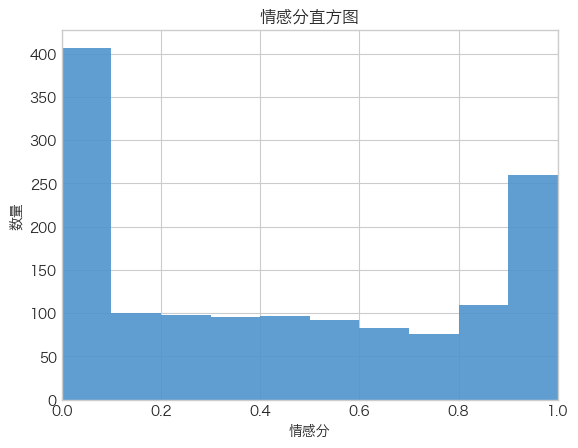

In [15]:
#  ÁªòÂà∂ÊÉÖÊÑüÂàÜÁõ¥ÊñπÂõæ
 
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
 
bins = np.arange(0, 1.1, 0.1)
plt.hist(df2['ÊÉÖÊÑü'], bins, color = '#4F94CD', alpha=0.9)
plt.xlim(0, 1)
plt.xlabel('ÊÉÖÊÑüÂàÜ')
plt.ylabel('Êï∞Èáè')
plt.title('ÊÉÖÊÑüÂàÜÁõ¥ÊñπÂõæ')
plt.show()

In [16]:
#  ÂÖ≥ÈîÆËØçÊèêÂèñtop10
#  ËøôÂÑøÁõ¥Êé•ÂÜôimport jiebaËøêË°å‰ºöÊòæÁ§∫Ê≤°ÊúâanalyseÂ±ûÊÄß
from jieba import analyse
key_words = jieba.analyse.extract_tags(sentence=jieba_text, topK=10, withWeight=True, allowPOS=())
key_words

[('br', 0.0966579514530232),
 ('‰∏≠Âúã', 0.08475081250591164),
 ('Ë•øÂ≠ê', 0.04900191341017108),
 ('Êùé‰Ω≥Áê¶', 0.04552729597425005),
 ('ÁúâÁ¨î', 0.04050337061273729),
 ('Á∂ìÊøü', 0.03782267665553082),
 ('79', 0.036421836779400044),
 ('Âè∞ÁÅ£', 0.03432057696520389),
 ('‰ªÄÈ∫º', 0.03151889721294234),
 ('Â∞±ÊòØ', 0.02867074986247012)]

In [17]:
#  ËÆ°ÁÆóÁßØÊûÅËØÑËÆ∫‰∏éÊ∂àÊûÅËØÑËÆ∫ÂêÑËá™ÁöÑÊï∞ÁõÆ
pos, neg = 0, 0
for i in df2['ÊÉÖÊÑü']:
    if i >= 0.4:
        pos += 1
    else:
        neg += 1
print('ÁßØÊûÅËØÑËÆ∫Êï∞ÁõÆ‰∏∫:', pos, '\nÊ∂àÊûÅËØÑËÆ∫Êï∞ÁõÆ‰∏∫Ôºö', neg)

ÁßØÊûÅËØÑËÆ∫Êï∞ÁõÆ‰∏∫: 717 
Ê∂àÊûÅËØÑËÆ∫Êï∞ÁõÆ‰∏∫Ôºö 701


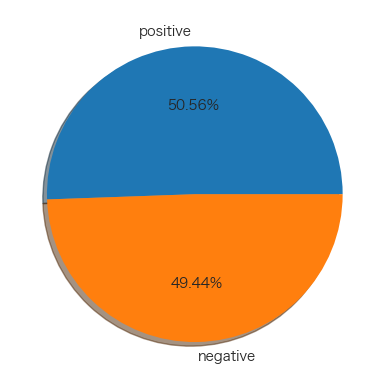

In [18]:
#  ÁßØÊûÅÊ∂àÊûÅËØÑËÆ∫Âç†ÊØî
import matplotlib.pyplot as plt
 
plt.rcParams['font.sans-serif']=['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
 
pie_labels = 'positive', 'negative'
plt.pie([pos, neg], labels=pie_labels, autopct='%1.2f%%', shadow=True)
 
plt.show()

In [19]:
#  Ëé∑ÂèñÊ∂àÊûÅËØÑËÆ∫ÁöÑÊï∞ÊçÆ
data2 = df2[df2['ÊÉÖÊÑü'] < 0.4]
data2.head()

publishtime  likeCount  \
0  2023-11-26T11:00:33Z        0.0   
3  2023-11-15T07:28:29Z        1.0   
7  2023-11-12T04:23:26Z        1.0   
8  2023-11-11T14:24:03Z        1.0   
9  2023-11-11T12:41:44Z        0.0   

                                             comment        ÊÉÖÊÑü  
0                               ÊãºÂ§öÂ§öÁöÑAPPÔºåÔºåÂæàÊµÅÊ∞ìÔºåÔºåÂêéÂè∞Âæà‰∏çËßÑÁü©  0.234728  
3  Âú®Âè∞ÁÅ£Ë≤∑Êù±Ë•øÁúüÁöÑÂæàÊñπ‰æøÔºåÂ∞±ÁÆó‰∏çÁî®Á∂≤ÊãçÂéªË°ó‰∏äË≤∑ÂÖ∂ÂØ¶‰πüÂæàÂø´ÔºåËÄå‰∏îÁ∂≤Êãç‰∏ã‰æÜÁöÑÊù±Ë•øÊúâÁöÑÂìÅË≥™ÁúüÁöÑ‰∏çÊÄéÊ®£...  0.150732  
7                                         ÂÖßÂÆπË™™ÂæóÁúüË≤ºÂàáÔºåüëçüèª  0.095883  
8  ÊäñÈü≥Ë¶ÅÂØ¶ÂêçÊâçËÉΩË≤∑Êù±Ë•øÔºåÂè∞ËÉûË≠â‰∏çË°åÈô§ÈùûËæ¶ÂÄã18Á¢ºÁöÑÂ±ÖÊ∞ëÂ±Ö‰ΩèË≠âÔºåÊÑüË¶∫‰ªäÂπ¥Èõô11Èä∑ÂîÆÊòØÁúüÁöÑ‰∏çÂ•ΩÔºåÂâç...  0.000007  
9                 Âú®ÁΩëÁªú‰∏ä‰∫ÜÂá†Ê¨°ÂΩìÔºåÂæàÂ∞ëÁΩëÁªúË≤∑‰∫Ü„ÄÇÂú®Â§ßÈ©¨ÔºåË∫´‰ªΩË¢´ÁõóÂèñ‰∫ÜÔºåÂæàÈ¨ºÈ∫ªÁÉ¶ÁöÑüò°ÔºÅ  0.163665

In [ ]:
#Ê∂àÊûÅËØÑËÆ∫ËØç‰∫ëÂõæ
stopwords = open(r"stop_word.txt",encoding='utf-8').read().split("\n")
text2 = ''
for s in data2['comment']:
    if isinstance(s, str):  # Ê£ÄÊü•ËØÑËÆ∫ÂÜÖÂÆπÊòØÂê¶‰∏∫Â≠óÁ¨¶‰∏≤Á±ªÂûã
        text2 += s
data_cut2 = ' '.join(jieba.lcut(text2))
wc.generate(data_cut2)
image = wc.to_file('Ê∂àÊûÅÊ≤πÁÆ°ËØç‰∫ë.png')
wc.to_image()  # ÊòæÁ§∫ÂõæÁâá

In [22]:
#  Ëé∑ÂèñÁßØÊûÅËØÑËÆ∫ÁöÑÊï∞ÊçÆ
data3 = df2[df2['ÊÉÖÊÑü'] >= 0.4]
data3.head()

publishtime  likeCount  \
1  2023-11-26T09:33:13Z        0.0   
2  2023-11-18T04:53:00Z        0.0   
4  2023-11-15T06:36:43Z        1.0   
5  2023-11-14T10:28:35Z        0.0   
6  2023-11-13T08:34:49Z        2.0   

                                             comment        ÊÉÖÊÑü  
1  ÊàëÂú®Ê∑òÂØ∂Ë≤∑‰∫ÜÂÖ¨‰ªî.Êî∂Âà∞Ë≤®ÊôÇ.Â∞±Ë¶∫Âæó‰∫∫Áâ©Â∞±ÊÄ™ÊÄ™ÁöÑ.Âú®Á∂≤‰∏äÂïèÂà•‰∫∫.ÊâçÁü•ÈÅìËá™Â∑±Ë≤∑Âà∞ÁõúÁâàT-TÂÄí‰∏çÊòØ...  0.977121  
2                           ÂèØÊòØ‰Ω†ÊúâÊÉ≥ÈÅéË£ΩÈÄ†ÈÄô‰∫õÁî¢ÂìÅÁöÑÂãûÂ∑•ÂøÖÂÆöË¢´ÂâùÂâäÂãûÂäõËñ™Ë≥á  0.741640  
4                              ÊãºÂ§öÂ§öÊúâËÅΩË™™ÈÅé‰∏çÈåØÔºå‰ΩÜÊòØÊµ∑Â§ñÁöÑ‰∫∫‰∏çÂ•ΩË®ªÂÜä„ÄÇ  0.519508  
5                                    Êù±ÊòáË•øÈôçÔºåÈòªÂúãÁúüÁâÜÂ§ßÔºåË≥ºÊöñÂøÉüòä  0.770640  
6                        Ê∑òÂØ∂Êó©Â∞±‰∏çË°å‰∫Ü„ÄÇÁèæÂú®ÊãºÂ§öÂ§öÊäñÈü≥ ÁîöËá≥Ë¶ñÈ†ªËôüÈÉΩÊØîÊ∑òÂØ∂Â•Ω„ÄÇ  0.806137

In [ ]:
#ÁßØÊûÅËØÑËÆ∫ËØç‰∫ëÂõæ
stopwords = open(r"stop_word.txt",encoding='utf-8').read().split("\n")
text3 = ''
for s in data3['comment']:
    if isinstance(s, str):  # Ê£ÄÊü•ËØÑËÆ∫ÂÜÖÂÆπÊòØÂê¶‰∏∫Â≠óÁ¨¶‰∏≤Á±ªÂûã
        text3 += s
data_cut3 = ' '.join(jieba.lcut(text3))
wc.generate(data_cut3)
image = wc.to_file('ÁßØÊûÅÊ≤πÁÆ°ËØç‰∫ë.png')
wc.to_image()  # ÊòæÁ§∫ÂõæÁâá